<a href="https://colab.research.google.com/github/RinaldiHamzah/text_prosesing/blob/main/_ormas_teks_prosesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Semester_7 2026/Pemrosesan Teks Praktik/ormas.csv')

# Menampilkan 5 baris pertama
print(data.head())

   conversation_id_str                      created_at  favorite_count  \
0  1976436246126919777  Thu Oct 09 23:54:56 +0000 2025               0   
1  1976276555472183522  Thu Oct 09 23:52:21 +0000 2025               0   
2  1976431722603610240  Thu Oct 09 23:36:57 +0000 2025               1   
3  1976197385291432062  Thu Oct 09 23:27:43 +0000 2025               1   
4  1976428079947055301  Thu Oct 09 23:22:29 +0000 2025               0   

                                           full_text               id_str  \
0  Nggak itu lebih ke Ormas pemalak instansi pema...  1976436246126919777   
1  @Krist888 @ch_chotimah2 @prabowo @Gerindra Ben...  1976435597347856538   
2  Dih apa ini ormas cabang inter kah nitip rokok...  1976431722603610240   
3  @noelaaee @Norkaf_ @IDWTR @zenrs Ormas masih s...  1976429397944172711   
4      Ormas PPI Tunisia PPI lain begini nggak? @ppi  1976428079947055301   

                                           image_url in_reply_to_screen_name  \
0           

# **ORMAS TEKS REPROSESSING**

Cleaning Teks

In [ ]:
import re

def clean_text(text):
    text = str(text).lower() #input berupa string
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # Hapus URL/link
    text = re.sub(r'@\w+', '', text)  # Hapus mention @username
    text = re.sub(r'#', '', text)  #ormas → ormas
    text = re.sub(r'\d+', '', text) # Hapus angka
    text = re.sub(r'[^a-z\s]', ' ', text) # Hapus tanda baca dan karakter non-huruf
    text = re.sub(r'\brt\b', '', text) # Hapus kata "rt" (retweet)
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

data['clean'] = data['full_text'].apply(clean_text)

print(data[['full_text', 'clean']].head())

                                           full_text  \
0  Nggak itu lebih ke Ormas pemalak instansi pema...   
1  @Krist888 @ch_chotimah2 @prabowo @Gerindra Ben...   
2  Dih apa ini ormas cabang inter kah nitip rokok...   
3  @noelaaee @Norkaf_ @IDWTR @zenrs Ormas masih s...   
4      Ormas PPI Tunisia PPI lain begini nggak? @ppi   

                                               clean  
0  nggak itu lebih ke ormas pemalak instansi pema...  
1  bener sih emg kntl bgt pemerintah yg bikin mak...  
2  dih apa ini ormas cabang inter kah nitip rokok...  
3  ormas masih sakit hati ga abis abis wkwkwkwkw ...  
4            ormas ppi tunisia ppi lain begini nggak  


Normalisasi Teks

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Pastikan tokenizer tersedia
nltk.download('punkt')
nltk.download('punkt_tab')
#Kamus Normalisasi (kata tidak baku → baku) ===
normalisasi_kamus = {
    'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'tdk': 'tidak',
    'dr': 'dari', 'yg': 'yang', 'dgn': 'dengan', 'aja': 'saja',
    'blm': 'belum', 'udh': 'sudah', 'klo': 'kalau', 'kalo': 'kalau',
    'sm': 'sama', 'tp': 'tapi', 'trs': 'terus', 'bgt': 'banget',
    'dg': 'dengan', 'krn': 'karena', 'sy': 'saya', 'gw': 'saya',
    'gue': 'saya', 'loe': 'kamu', 'lu': 'kamu', 'km': 'kamu',
    'nu': 'nahdatul ulama', 'ormas':'organisasi masyarakat',
    'ppi': 'organisasi masyarakat', 'emg': 'memang'

}

#Fungsi Normalisasi Kata Tidak Baku ===
def normalisasi_kata(teks):
    tokens = word_tokenize(str(teks).lower())
    hasil = []
    for k in tokens:
        if k in normalisasi_kamus:
            hasil.append(normalisasi_kamus[k])
        else:
            hasil.append(k)
    return hasil  # hasil dalam bentuk list

data['normal'] = data['clean'].apply(
    lambda x: ' '.join(normalisasi_kata(x))
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
print(data[['clean', 'normal']].head())

                                               clean  \
0  nggak itu lebih ke ormas pemalak instansi pema...   
1  bener sih emg kntl bgt pemerintah yg bikin mak...   
2  dih apa ini ormas cabang inter kah nitip rokok...   
3  ormas masih sakit hati ga abis abis wkwkwkwkw ...   
4            ormas ppi tunisia ppi lain begini nggak   

                                              normal  
0  tidak itu lebih ke organisasi masyarakat pemal...  
1  bener sih memang kntl banget pemerintah yang b...  
2  dih apa ini organisasi masyarakat cabang inter...  
3  organisasi masyarakat masih sakit hati tidak a...  
4  organisasi masyarakat organisasi masyarakat tu...  


In [ ]:
! pip install sastrawi

 Lematisasi Teks

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Inisialisasi Sastrawi Stemmer ===
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()

#Fungsi Lemmatization Rule-Based (Manual) ===
def lemmatize_rule_based(kata):
    prefixes = ['meng', 'meny', 'men', 'mem', 'me',
                'peng', 'peny', 'pen', 'pem', 'di',
                'ke', 'se', 'ber', 'ter', 'per']
    suffixes = ['kan', 'an', 'lah', 'nya', 'mu', 'ku']

    # Hapus awalan khusus
    if kata.startswith("meny"):
        kata = "s" + kata[4:]
    elif kata.startswith("men"):
        kata = kata[3:]
    elif kata.startswith("mem"):
        if kata[3] in "bp":
            kata = kata[3:]
        else:
            kata = "p" + kata[3:]
    elif kata.startswith("meng"):
        kata = kata[4:]
    elif kata.startswith("me"):
        kata = kata[2:]
    else:
        # umum
        for p in prefixes:
            if kata.startswith(p) and len(kata) > len(p) + 3:
                kata = kata[len(p):]
                break

    # Hapus akhiran
    for s in suffixes:
        if kata.endswith(s) and len(kata) > len(s) + 3:
            kata = kata[:-len(s)]
            break

    return kata

#Fungsi Gabungan Manual + Library ===
def lemmatize_indonesian_combined(teks):
    teks = str(teks).lower()
    tokens = teks.split()

    hasil_manual = [lemmatize_rule_based(k) for k in tokens]
    teks_manual = ' '.join(hasil_manual)

    # Lemmatization tambahan dengan Sastrawi
    hasil_sastrawi = stemmer_id.stem(teks_manual)

    return hasil_sastrawi


data['lemma'] = data['normal'].apply(lemmatize_indonesian_combined)

In [ ]:
print(data[['normal', 'lemma']].head())

                                              normal  \
0  tidak itu lebih ke organisasi masyarakat pemal...   
1  bener sih memang kntl banget pemerintah yang b...   
2  dih apa ini organisasi masyarakat cabang inter...   
3  organisasi masyarakat masih sakit hati tidak a...   
4  organisasi masyarakat organisasi masyarakat tu...   

                                               lemma  
0  tidak itu lebih ke organisasi masyarakat alak ...  
1  bener sih pang kntl banget erintah yang bikin ...  
2  dih apa ini organisasi masyarakat cabang inter...  
3  organisasi masyarakat masih sakit hati tidak a...  
4  organisasi masyarakat organisasi masyarakat tu...  


**Steaming Teks**

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer

factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
stemmer_en = PorterStemmer()

def detect_language(text):
    eng = re.findall(r'\b(the|is|are|and|for|to|of)\b', text.lower())
    indo = re.findall(r'\b(yang|dan|dari|ke|di|itu|dengan)\b', text.lower())
    return 'en' if len(eng) > len(indo) else 'id'

def bilingual_stem(text):
    lang = detect_language(text)
    if lang == 'en':
        tokens = text.split()
        return ' '.join([stemmer_en.stem(t) for t in tokens])
    else:
        return stemmer_id.stem(text)

data['stem'] = data['lemma'].apply(bilingual_stem)

In [ ]:
print(data[['lemma', 'stem']].head())

                                               lemma  \
0  tidak itu lebih ke organisasi masyarakat alak ...   
1  bener sih pang kntl banget erintah yang bikin ...   
2  dih apa ini organisasi masyarakat cabang inter...   
3  organisasi masyarakat masih sakit hati tidak a...   
4  organisasi masyarakat organisasi masyarakat tu...   

                                                stem  
0  tidak itu lebih ke organisasi masyarakat alak ...  
1  bener sih pang kntl banget erintah yang bikin ...  
2  dih apa ini organisasi masyarakat cabang inter...  
3  organisasi masyarakat masih sakit hati tidak a...  
4  organisasi masyarakat organisasi masyarakat tu...  


**Stopword Removal Teks**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#Download resource penting ===
nltk.download('stopwords')
nltk.download('punkt')

#Inisialisasi stopwords bawaan ===
factory = StopWordRemoverFactory()
stopwords_id = set(factory.get_stop_words())
stopwords_en = set(stopwords.words('english'))

#Stopword manual (tambahan sosial media) ===
stopwords_manual = {
    'yg', 'gk', 'ga', 'nggak', 'tdk', 'aja', 'nih', 'dong', 'deh', 'sih', 'dih',
    'ya', 'kok', 'loh', 'wkwk', 'haha', 'hehe', 'anjir', 'anjay', 'wkwkwkwwk',
    'bro', 'sis', 'gan', 'bang', 'gua', 'gue', 'lu', 'loe', 'gw', 'km', 'sy',
    'nih', 'nya', 'lah', 'dong', 'banget', 'bgt', 'rt', 'via', 'sm', 'dr',
    'ttp', 'pdhl', 'gitu', 'loh', 'wkwkwk', 'hahaha', 'klo', 'kalo', 'tp',
    'apa'
}
stopwords_id.update(stopwords_manual)

#Kamus normalisasi slang (biar cocok) ===
normalisasi_kamus = {
    'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'tdk': 'tidak', 'kntl': 'keren',
    'yg': 'yang', 'aja': 'saja', 'bgt': 'banget', 'udh': 'sudah',
    'klo': 'kalau', 'kalo': 'kalau', 'sm': 'sama', 'dr': 'dari',
    'tp': 'tapi', 'sy': 'saya', 'gue': 'saya', 'gua': 'saya', 'loe': 'kamu', 'lu': 'kamu'
}

#Deteksi bahasa sederhana ===
def detect_language(text):
    eng = re.findall(r'\b(the|is|are|of|and|to|for)\b', text.lower())
    indo = re.findall(r'\b(yang|dan|di|ke|dari|untuk|itu|dengan)\b', text.lower())
    return 'en' if len(eng) > len(indo) else 'id'

#Fungsi Stopword Removal + Normalisasi ===
def bilingual_stopword_removal(text):
    text = str(text).lower()
    tokens = nltk.word_tokenize(text)
    lang = detect_language(text)

    normalized_tokens = []
    for w in tokens:
        # normalisasi slang
        if w in normalisasi_kamus:
            w = normalisasi_kamus[w]
        normalized_tokens.append(w)

    if lang == 'en':
        filtered = [w for w in normalized_tokens if w not in stopwords_en]
    else:
        filtered = [w for w in normalized_tokens if w not in stopwords_id]

    return ' '.join(filtered)

#Terapkan ke DataFrame ===
data['stop'] = data['stem'].apply(bilingual_stopword_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(data[['stem', 'stop']].head())

                                                stem  \
0  tidak itu lebih ke organisasi masyarakat alak ...   
1  bener sih pang kntl banget erintah yang bikin ...   
2  dih apa ini organisasi masyarakat cabang inter...   
3  organisasi masyarakat masih sakit hati tidak a...   
4  organisasi masyarakat organisasi masyarakat tu...   

                                                stop  
0  lebih organisasi masyarakat alak instansi alak...  
1  bener pang keren erintah bikin makin payah ant...  
2  organisasi masyarakat cabang inter nitip rokok...  
3  organisasi masyarakat sakit hati abis abis wkw...  
4  organisasi masyarakat organisasi masyarakat tu...  


In [ ]:
print("Stopword Manual:", stopwords_manual)

Stopword Manual: {'dih', 'nya', 'tp', 'anjay', 'kalo', 'lah', 'wkwkwkwwk', 'bro', 'ya', 'gitu', 'deh', 'hahaha', 'dong', 'wkwkwk', 'gua', 'sy', 'wkwk', 'loe', 'sis', 'gw', 'sm', 'yg', 'loh', 'tdk', 'nih', 'gan', 'klo', 'ga', 'anjir', 'gue', 'lu', 'aja', 'rt', 'ttp', 'banget', 'kok', 'via', 'hehe', 'bang', 'bgt', 'gk', 'sih', 'dr', 'haha', 'apa', 'nggak', 'pdhl', 'km'}


Word Cloud

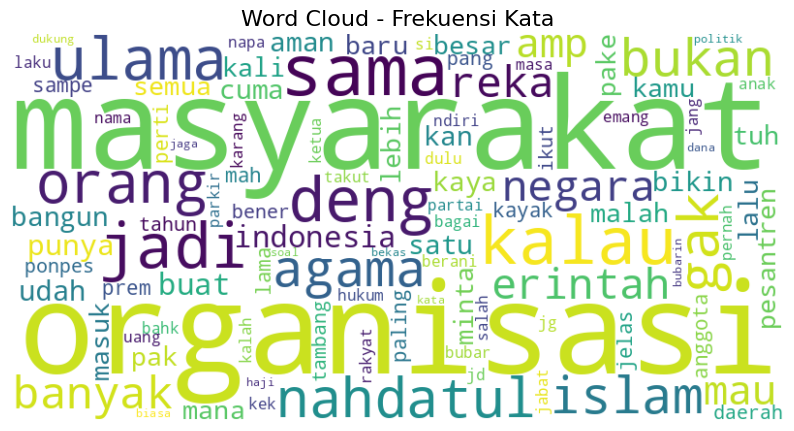

In [ ]:
# word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# === Visualisasi Word Cloud ===
text_all = " ".join(data['stop'])

wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      max_words=100,
                      collocations=False).generate(text_all)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Frekuensi Kata", fontsize=16)
plt.show()

**Tokenisasi Teks**

In [ ]:
! pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['stop'])
data['token'] = tokenizer.texts_to_sequences(data['stop'])

print(data[['stop', 'token']].head())


                                                stop  \
0  lebih organisasi masyarakat alak instansi alak...   
1  bener pang keren erintah bikin makin payah ant...   
2  organisasi masyarakat cabang inter nitip rokok...   
3  organisasi masyarakat sakit hati abis abis wkw...   
4  organisasi masyarakat organisasi masyarakat tu...   

                                               token  
0  [43, 3, 2, 595, 748, 595, 1711, 1712, 595, 217...  
1  [58, 59, 749, 18, 31, 128, 1051, 1052, 3, 2, 1...  
2          [3, 2, 1056, 1721, 1722, 1057, 752, 1058]  
3  [3, 2, 753, 281, 386, 386, 1723, 1724, 1725, 5...  
4                      [3, 2, 3, 2, 1727, 3, 2, 186]  


In [ ]:
tempArr = []
tokenizer.word_index

{'<OOV>': 1,
 'masyarakat': 2,
 'organisasi': 3,
 'sama': 4,
 'kalau': 5,
 'jadi': 6,
 'deng': 7,
 'ulama': 8,
 'orang': 9,
 'gak': 10,
 'nahdatul': 11,
 'agama': 12,
 'islam': 13,
 'bukan': 14,
 'banyak': 15,
 'reka': 16,
 'negara': 17,
 'erintah': 18,
 'amp': 19,
 'mau': 20,
 'indonesia': 21,
 'buat': 22,
 'punya': 23,
 'udah': 24,
 'cuma': 25,
 'bangun': 26,
 'kan': 27,
 'kaya': 28,
 'aman': 29,
 'satu': 30,
 'bikin': 31,
 'besar': 32,
 'semua': 33,
 'mana': 34,
 'lalu': 35,
 'baru': 36,
 'malah': 37,
 'pake': 38,
 'kamu': 39,
 'pesantren': 40,
 'minta': 41,
 'tuh': 42,
 'lebih': 43,
 'kali': 44,
 'pak': 45,
 'masuk': 46,
 'kayak': 47,
 'anggota': 48,
 'paling': 49,
 'jelas': 50,
 'prem': 51,
 'lama': 52,
 'sampe': 53,
 'perti': 54,
 'mah': 55,
 'tahun': 56,
 'ponpes': 57,
 'bener': 58,
 'pang': 59,
 'daerah': 60,
 'ikut': 61,
 'tambang': 62,
 'partai': 63,
 'laku': 64,
 'nama': 65,
 'anak': 66,
 'bubar': 67,
 'bagai': 68,
 'dulu': 69,
 'ndiri': 70,
 'jg': 71,
 'bahk': 72,
 'hukum':

In [ ]:
for key in tokenizer.word_index:
  tempArr.append(key)

In [ ]:
numTextTokenized = []
for i in data['token']:
  tempArr_2 = []
  for j in i:
    tempArr_2.append(j)
  numTextTokenized.append(tempArr_2)

In [ ]:
for i in range(len(numTextTokenized)):
  for j in range(len(numTextTokenized[i])):
    numTextTokenized[i][j] = tempArr[numTextTokenized[i][j] - 1]

data['tokening'] = numTextTokenized

In [ ]:
print(data[['stop', 'tokening']].head())

                                                stop  \
0  lebih organisasi masyarakat alak instansi alak...   
1  bener pang keren erintah bikin makin payah ant...   
2  organisasi masyarakat cabang inter nitip rokok...   
3  organisasi masyarakat sakit hati abis abis wkw...   
4  organisasi masyarakat organisasi masyarakat tu...   

                                            tokening  
0  [lebih, organisasi, masyarakat, alak, instansi...  
1  [bener, pang, keren, erintah, bikin, makin, pa...  
2  [organisasi, masyarakat, cabang, inter, nitip,...  
3  [organisasi, masyarakat, sakit, hati, abis, ab...  
4  [organisasi, masyarakat, organisasi, masyaraka...  


In [ ]:
#simpan dataFrame baru
data.to_csv("#ormas_clean.csv", index = False)

# **TF-IDF FRECUENCY**

In [7]:
import pandas as pd

# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Semester_7 2026/Pemrosesan Teks Praktik/#ormas_clean.csv')

# Menampilkan 5 baris pertama
print(data.head())

   conversation_id_str                      created_at  favorite_count  \
0  1976436246126919777  Thu Oct 09 23:54:56 +0000 2025               0   
1  1976276555472183522  Thu Oct 09 23:52:21 +0000 2025               0   
2  1976431722603610240  Thu Oct 09 23:36:57 +0000 2025               1   
3  1976197385291432062  Thu Oct 09 23:27:43 +0000 2025               1   
4  1976428079947055301  Thu Oct 09 23:22:29 +0000 2025               0   

                                           full_text               id_str  \
0  Nggak itu lebih ke Ormas pemalak instansi pema...  1976436246126919777   
1  @Krist888 @ch_chotimah2 @prabowo @Gerindra Ben...  1976435597347856538   
2  Dih apa ini ormas cabang inter kah nitip rokok...  1976431722603610240   
3  @noelaaee @Norkaf_ @IDWTR @zenrs Ormas masih s...  1976429397944172711   
4      Ormas PPI Tunisia PPI lain begini nggak? @ppi  1976428079947055301   

                                           image_url in_reply_to_screen_name  \
0           

In [8]:
# Melihat kembali baris yang telah di tokenisasi
for i, tokens in enumerate(data['tokening']):
    print(f"Review {i+1}:")
    print(tokens, "\n")

Review 1:
['lebih', 'organisasi', 'masyarakat', 'alak', 'instansi', 'alak', 'sam', 'regulasi', 'alak', 'tambah', 'legislatif', 'banyak', 'bodoh'] 

Review 2:
['bener', 'pang', 'keren', 'erintah', 'bikin', 'makin', 'payah', 'antar', 'organisasi', 'masyarakat', 'agama', 'kali', 'agama', 'ring', 'jg', 'saling', 'sabotase', 'provokasi', 'forum', 'rukun', 'umat', 'agama', 'fkub', 'biar', 'ngasih', 'rekomendasi', 'sbg', 'syarat', 'imb', 'trus', 'erintah', 'diem', 'bae', 'jnck', 'pang'] 

Review 3:
['organisasi', 'masyarakat', 'cabang', 'inter', 'nitip', 'rokok', 'anying', 'najis'] 

Review 4:
['organisasi', 'masyarakat', 'sakit', 'hati', 'abis', 'abis', 'wkwkwkwkw', 'puasa', 'nyaris', 'tahun', 'emang', 'bikin', 'tantrum'] 

Review 5:
['organisasi', 'masyarakat', 'organisasi', 'masyarakat', 'tunisia', 'organisasi', 'masyarakat', 'begini'] 

Review 6:
['sholawat', 'kek', 'dj', 'bukan', 'kek', 'zionis', 'versi', 'lite', 'organisasi', 'masyarakat', 'nambang'] 

Review 7:
['bias', 'pungli', 'orga

In [9]:
index = 0
for i in data['tokening']:
  if index == 5:
    break
  print(type(i))
  index += 1

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [10]:
# Convert a string-formatted list to a real Python list
import ast

def convert_text_list(texts):
    # Safely evaluate the string to a Python object (e.g., "[1, 2, 3]" → [1, 2, 3])
    texts = ast.literal_eval(texts)
    return [text for text in texts]

# Apply the conversion to the 'tweet_clean' column to create a new column 'tekslist'
data["list"] = data["tokening"].apply(convert_text_list)

# Print one example converted list
print(data["list"][0])

# Print the type of that element to confirm it's now a Python list
print("\ntype :", type(data["list"][5]))

['lebih', 'organisasi', 'masyarakat', 'alak', 'instansi', 'alak', 'sam', 'regulasi', 'alak', 'tambah', 'legislatif', 'banyak', 'bodoh']

type : <class 'list'>


In [11]:
print(data[['tokening', 'list']].head())

                                            tokening  \
0  ['lebih', 'organisasi', 'masyarakat', 'alak', ...   
1  ['bener', 'pang', 'keren', 'erintah', 'bikin',...   
2  ['organisasi', 'masyarakat', 'cabang', 'inter'...   
3  ['organisasi', 'masyarakat', 'sakit', 'hati', ...   
4  ['organisasi', 'masyarakat', 'organisasi', 'ma...   

                                                list  
0  [lebih, organisasi, masyarakat, alak, instansi...  
1  [bener, pang, keren, erintah, bikin, makin, pa...  
2  [organisasi, masyarakat, cabang, inter, nitip,...  
3  [organisasi, masyarakat, sakit, hati, abis, ab...  
4  [organisasi, masyarakat, organisasi, masyaraka...  


Labeling Teks

In [52]:
from transformers import pipeline
#Load model IndoBERT untuk sentiment analysis ===
analyzer = pipeline(
    "sentiment-analysis",
    model="w11wo/indonesian-roberta-base-sentiment-classifier"
)

#Terapkan analisis sentimen ke seluruh kolom ===
# gunakan .apply() untuk memproses tiap teks di kolom
data['sentiment'] = data['full_text'].apply(analyzer)

#Ekstrak label dan skor dari hasil pipeline ===
data['label'] = data['sentiment'].apply(lambda x: x[0]['label'])
data['score'] = data['sentiment'].apply(lambda x: x[0]['score'])

Device set to use cpu


In [53]:
#Lihat hasilnya
print(data[['clean', 'label', 'score']])

                                                 clean     label     score
0    nggak itu lebih ke ormas pemalak instansi pema...  negative  0.999497
1    bener sih emg kntl bgt pemerintah yg bikin mak...  negative  0.998786
2    dih apa ini ormas cabang inter kah nitip rokok...  negative  0.639673
3    ormas masih sakit hati ga abis abis wkwkwkwkw ...  negative  0.996720
4              ormas ppi tunisia ppi lain begini nggak   neutral  0.669823
..                                                 ...       ...       ...
958  di bubarin ormas tuh posisi di lakuin di antri...   neutral  0.989600
959                                    dibubarin ormas  negative  0.987527
960  entahlah kak tp ky ormas ijo sm biru jg kadang...  negative  0.970627
961                         koyo e anggota ormas pisan   neutral  0.997658
962     kim kai ayo kita ciuman sampe dipisahkan ormas   neutral  0.910831

[963 rows x 3 columns]


In [54]:
# Hitung jumlah (count) tiap label
count_data = data['label'].value_counts().reset_index()
count_data.columns = ['label', 'count']

# Hitung rata-rata skor confidence tiap label
mean_score = data.groupby('label')['score'].mean().reset_index()
mean_score.columns = ['label', 'avg_score']

# Gabungkan keduanya
summary = pd.merge(count_data, mean_score, on='label')

# Tampilkan hasil
print(summary)
# clean

      label  count  avg_score
0  negative    636   0.946976
1   neutral    274   0.912304
2  positive     53   0.791506


In [55]:
# Dapatkan index (nomor baris) untuk tiap kategori sentimen
index_positive = data.index[data['label'] == 'positive'].tolist()
index_negative = data.index[data['label'] == 'negative'].tolist()
index_neutral  = data.index[data['label'] == 'neutral'].tolist()

print("Index sentimen POSITIF :", index_positive)
print("Index sentimen NEGATIF :", index_negative)
print("Index sentimen NETRAL  :", index_neutral)

Index sentimen POSITIF : [20, 60, 65, 75, 79, 113, 121, 129, 153, 169, 170, 198, 201, 214, 215, 228, 235, 301, 315, 318, 330, 401, 423, 434, 474, 477, 478, 486, 520, 537, 546, 559, 578, 591, 610, 654, 661, 687, 742, 748, 787, 817, 827, 838, 843, 848, 855, 906, 935, 937, 938, 941, 945]
Index sentimen NEGATIF : [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 32, 33, 35, 37, 38, 39, 40, 41, 45, 46, 48, 49, 51, 53, 56, 57, 61, 62, 63, 64, 68, 71, 72, 73, 74, 77, 78, 82, 85, 87, 88, 89, 90, 92, 93, 95, 96, 97, 99, 100, 101, 103, 104, 105, 106, 108, 109, 112, 114, 115, 116, 117, 118, 122, 123, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 144, 145, 149, 150, 151, 154, 155, 156, 157, 158, 160, 161, 162, 166, 168, 171, 172, 173, 174, 175, 176, 177, 178, 181, 182, 183, 184, 186, 187, 188, 190, 192, 193, 194, 197, 199, 200, 204, 207, 208, 209, 211, 213, 217, 218, 219, 220, 221, 222, 224, 225, 227, 229, 230, 231, 232, 233, 234, 236, 23

In [22]:
# # simpan ke file Excel
# data.to_excel("ormas_sentimen.xlsx", index=False)

**Perhitungan TF**

In [56]:
def calc_TF(document):
    # Step 1: Count term occurrences
    tf_dict = {}
    for term in document:
        if term in tf_dict:
            tf_dict[term] += 1
        else:
            tf_dict[term] = 1

    # Step 2: Normalize by the total number of terms (TF calculation)
    for term in tf_dict:
        tf_dict[term] = tf_dict[term] / len(document)

    return tf_dict

# Apply TF calculation to each list of tokens in 'tekslist'
data["tf"] = data["list"].apply(calc_TF)

# Display the first few TF dictionaries
data["tf"].head()

,tf
0,"{'lebih': 0.07692307692307693, 'organisasi': 0..."
1,"{'bener': 0.02857142857142857, 'pang': 0.05714..."
2,"{'organisasi': 0.125, 'masyarakat': 0.125, 'ca..."
3,"{'organisasi': 0.07692307692307693, 'masyaraka..."
4,"{'organisasi': 0.375, 'masyarakat': 0.375, 'tu..."


In [57]:
#Displaying a Document’s TF Values
#Prints all terms and their Term Frequency (TF) values for a specific document (here, document index = 1)
index = 1

print("%20s" % "term", "\t", "tf\n")
for key in data["tf"][index]:
    print('%20s' % key, "\t", data["tf"][index][key])

                term 	 tf

               bener 	 0.02857142857142857
                pang 	 0.05714285714285714
               keren 	 0.02857142857142857
             erintah 	 0.05714285714285714
               bikin 	 0.02857142857142857
               makin 	 0.02857142857142857
               payah 	 0.02857142857142857
               antar 	 0.02857142857142857
          organisasi 	 0.02857142857142857
          masyarakat 	 0.02857142857142857
               agama 	 0.08571428571428572
                kali 	 0.02857142857142857
                ring 	 0.02857142857142857
                  jg 	 0.02857142857142857
              saling 	 0.02857142857142857
            sabotase 	 0.02857142857142857
           provokasi 	 0.02857142857142857
               forum 	 0.02857142857142857
               rukun 	 0.02857142857142857
                umat 	 0.02857142857142857
                fkub 	 0.02857142857142857
                biar 	 0.02857142857142857
              ngasih 	 0.02

**Perhitungan IDF**

In [58]:
#Calculating Document Frequency (DF)
def calc_DF(tfDict):
    count_DF = {}
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(data["tf"])
DF

{'lebih': 29,
 'organisasi': 958,
 'masyarakat': 958,
 'alak': 2,
 'instansi': 3,
 'sam': 1,
 'regulasi': 1,
 'tambah': 10,
 'legislatif': 1,
 'banyak': 57,
 'bodoh': 8,
 'bener': 21,
 'pang': 23,
 'keren': 3,
 'erintah': 50,
 'bikin': 34,
 'makin': 13,
 'payah': 2,
 'antar': 2,
 'agama': 53,
 'kali': 28,
 'ring': 13,
 'jg': 20,
 'saling': 1,
 'sabotase': 1,
 'provokasi': 1,
 'forum': 3,
 'rukun': 3,
 'umat': 12,
 'fkub': 1,
 'biar': 17,
 'ngasih': 5,
 'rekomendasi': 1,
 'sbg': 4,
 'syarat': 2,
 'imb': 7,
 'trus': 2,
 'diem': 2,
 'bae': 1,
 'jnck': 1,
 'cabang': 2,
 'inter': 1,
 'nitip': 1,
 'rokok': 2,
 'anying': 3,
 'najis': 2,
 'sakit': 3,
 'hati': 7,
 'abis': 5,
 'wkwkwkwkw': 1,
 'puasa': 1,
 'nyaris': 1,
 'tahun': 19,
 'emang': 20,
 'tantrum': 1,
 'tunisia': 1,
 'begini': 12,
 'sholawat': 1,
 'kek': 18,
 'dj': 1,
 'bukan': 62,
 'zionis': 4,
 'versi': 1,
 'lite': 1,
 'nambang': 2,
 'bias': 2,
 'pungli': 13,
 'goes': 1,
 'international': 1,
 'lihat': 7,
 'ormas': 7,
 'bos': 3,
 'kal

In [59]:
#Calculating Inverse Document Frequency (IDF)
import numpy as np
n_document = len(data)

def calc_IDF(n_document, DF):
    IDF_dict = {}
    for term in DF:
        IDF_dict[term] = np.log10(n_document / (DF[term] + 1))
    return IDF_dict

IDF = calc_IDF(n_document, DF)

In [60]:
selected_terms = ['ormas', 'nu', 'hukum']

idf_selected = {term: IDF.get(term, 0) for term in selected_terms}
print("Nilai IDF untuk kata ['ormas', 'nu', 'hukum']:")
print(idf_selected)

Nilai IDF untuk kata ['ormas', 'nu', 'hukum']:
{'ormas': np.float64(2.080536300132591), 'nu': 0, 'hukum': np.float64(1.6614069923906152)}


In [61]:
#Calculating TF-IDF
#Purpose:
#Computes the TF-IDF value for each term in each document by multiplying TF and IDF.
def calc_TF_IDF(TF, IDF):
    TF_IDF_dict = {}
    for key in TF:
        if key in IDF:  # add safety check
            TF_IDF_dict[key] = TF[key] * IDF[key]
    return TF_IDF_dict

# Apply properly
data["tf-idf"] = data["tf"].apply(lambda x: calc_TF_IDF(x, IDF))

Hasil perhitungan TF_IDF

In [62]:
# Tampilkan nilai TF dan TF-IDF untuk dokumen ke-1
index = 1

print(f'{"Term":<20}\t{"TF":<10}\t{"TF-IDF":<20}')
print('-' * 60)

for term, tfidf_val in data["tf-idf"][index].items():
    tf_val = data["tf"][index].get(term, 0)
    print(f'{term:<20}\t{tf_val:<10.4f}\t{tfidf_val:<20.6f}')

Term                	TF        	TF-IDF              
------------------------------------------------------------
bener               	0.0286    	0.046892            
pang                	0.0571    	0.091624            
keren               	0.0286    	0.068045            
erintah             	0.0571    	0.072917            
bikin               	0.0286    	0.041130            
makin               	0.0286    	0.052500            
payah               	0.0286    	0.071614            
antar               	0.0286    	0.071614            
organisasi          	0.0286    	0.000052            
masyarakat          	0.0286    	0.000052            
agama               	0.0857    	0.107249            
kali                	0.0286    	0.043464            
ring                	0.0286    	0.052500            
jg                  	0.0286    	0.047469            
saling              	0.0286    	0.076646            
sabotase            	0.0286    	0.076646            
provokasi           	0.0286    	0.0766

Matrik TF-IDF Vectorizer

In [63]:
# === Membuat matriks TF-IDF ===
# Urutkan kata berdasarkan Document Frequency (descending)
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:30]
unique_terms = [term for term, _ in sorted_DF]

# Fungsi untuk mengonversi TF-IDF dict ke vektor
def calc_TF_IDF_Vec(tfidf_dict):
    vector = [0.0] * len(unique_terms)
    for i, term in enumerate(unique_terms):
        vector[i] = tfidf_dict.get(term, 0.0)
    return vector

# Terapkan fungsi ke setiap dokumen
data["tf_idf_vector"] = data["tf-idf"].apply(calc_TF_IDF_Vec)

# Cek hasil
print("Tampilan baris pertama dari matriks tf_idf_vector:\n")
print(data["tf_idf_vector"].iloc[1])
print("\nUkuran vektor (jumlah fitur):", len(data["tf_idf_vector"].iloc[0]))

Tampilan baris pertama dari matriks tf_idf_vector:

[np.float64(5.16479986820261e-05), np.float64(5.16479986820261e-05), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.10724850234013422), 0.0, np.float64(0.07291749205866276), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.04113023550783596), 0.0]

Ukuran vektor (jumlah fitur): 30


Menampilkan hasil ke dalam list

In [64]:
# === Menampilkan top 30 term berdasarkan total TF-IDF ===

# Konversi kolom TF-IDF vector menjadi array 2D
TF_IDF_Vec_List = np.array(data["tf_idf_vector"].to_list())

# Hitung jumlah TF-IDF setiap term di seluruh dokumen
term_sums = TF_IDF_Vec_List.sum(axis=0)

# Buat DataFrame untuk peringkat term
ranking = pd.DataFrame({
    'Term': unique_terms,
    'Rank': term_sums
})

# Urutkan dari nilai tertinggi ke terendah
ranking = ranking.sort_values(by='Rank', ascending=False).reset_index(drop=True)

# Tampilkan top 30 term
print("Top 30 terms berdasarkan total TF-IDF:")
print(ranking.head(100))

Top 30 terms berdasarkan total TF-IDF:
          Term      Rank
0         sama  7.457825
1         jadi  6.148941
2          gak  6.063272
3        kalau  6.050228
4        ulama  5.466040
5        islam  5.222763
6         deng  5.178039
7        agama  5.036986
8        bukan  5.025535
9       negara  4.990420
10       orang  4.883074
11    nahdatul  4.632540
12      banyak  4.343553
13     erintah  4.131088
14        buat  3.811258
15         kan  3.734483
16        udah  3.716398
17       punya  3.698002
18         mau  3.637313
19         amp  3.593197
20        reka  3.393506
21   indonesia  3.138284
22       semua  3.102005
23        satu  3.021477
24       besar  2.964338
25        kaya  2.953809
26        cuma  2.748901
27       bikin  2.449661
28  masyarakat  0.187376
29  organisasi  0.186685


In [65]:
#Analisis kata penting per dokumen

for i, tfidf_vector in enumerate(TF_IDF_Vec_List[:10]):  # contoh 5 dokumen pertama
    top_indices = tfidf_vector.argsort()[-5:][::-1]  # ambil 5 term tertinggi
    top_terms = [unique_terms[idx] for idx in top_indices]
    print(f"Dokumen {i}: {top_terms}")


Dokumen 0: ['banyak', 'masyarakat', 'organisasi', 'kaya', 'semua']
Dokumen 1: ['agama', 'erintah', 'bikin', 'organisasi', 'masyarakat']
Dokumen 2: ['masyarakat', 'organisasi', 'kaya', 'besar', 'semua']
Dokumen 3: ['bikin', 'organisasi', 'masyarakat', 'besar', 'kaya']
Dokumen 4: ['masyarakat', 'organisasi', 'kaya', 'besar', 'semua']
Dokumen 5: ['bukan', 'masyarakat', 'organisasi', 'kaya', 'semua']
Dokumen 6: ['masyarakat', 'organisasi', 'kaya', 'besar', 'semua']
Dokumen 7: ['bukan', 'kalau', 'organisasi', 'masyarakat', 'semua']
Dokumen 8: ['masyarakat', 'organisasi', 'kaya', 'besar', 'semua']
Dokumen 9: ['negara', 'masyarakat', 'organisasi', 'kaya', 'semua']


# Klasifikasi Algoritma Model

K-Means (Unsupervised Learning)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Contoh: data['stop'] berisi teks hasil preprocessing
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['stop'])

# Simpan ke kolom baru di dataframe (opsional)
data['tf_idf_vector'] = list(tfidf_matrix.toarray())

# Simpan daftar semua term unik
unique_terms = vectorizer.get_feature_names_out()

In [67]:
from sklearn.cluster import KMeans
import pandas as pd

# TF-IDF matrix
X = np.array(data["tf_idf_vector"].to_list())

# Tentukan jumlah cluster (misalnya 5)
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Tambahkan hasil cluster ke dataframe
data["Cluster"] = kmeans.labels_

# Lihat hasil klasterisasi
print(data[["stop", "Cluster"]].head())

# Hitung jumlah dokumen per cluster
print("\nJumlah dokumen per cluster:")
print(data["Cluster"].value_counts())

                                                stop  Cluster
0  lebih organisasi masyarakat alak instansi alak...        2
1  bener pang keren erintah bikin makin payah ant...        0
2  organisasi masyarakat cabang inter nitip rokok...        2
3  organisasi masyarakat sakit hati abis abis wkw...        2
4  organisasi masyarakat organisasi masyarakat tu...        2

Jumlah dokumen per cluster:
Cluster
2    475
3    237
0    107
4     89
1     55
Name: count, dtype: int64


In [68]:
# Hitung rata-rata TF-IDF setiap cluster
cluster_centers = kmeans.cluster_centers_

# Ambil top 10 kata per cluster
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    top_indices = cluster_centers[i].argsort()[-10:][::-1]
    top_terms = [unique_terms[idx] for idx in top_indices]
    print(", ".join(top_terms))


Cluster 0:
agama, deng, masyarakat, organisasi, kuat, politik, bekas, nahdatul, satu, ulama

Cluster 1:
baru, kayak, masyarakat, organisasi, kitar, udah, jadi, sama, jauh, bumn

Cluster 2:
masyarakat, organisasi, jadi, bubarin, bukan, tebak, anggota, tuh, mana, negara

Cluster 3:
sama, masyarakat, organisasi, kalau, ulama, nahdatul, reka, buat, islam, punya

Cluster 4:
gak, bubar, jelas, organisasi, masyarakat, jadi, erintah, sama, ulama, kalau


In [69]:
#Mengukur seberapa baik dokumen cocok dengan cluster-nya dibandingkan cluster lain
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.0030156318952856633


In [70]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores[k] = score
    print(f"Cluster = {k}, Silhouette Score = {score:.4f}")

best_k = max(scores, key=scores.get)
print("\nJumlah cluster optimal:", best_k)

Cluster = 2, Silhouette Score = 0.0025
Cluster = 3, Silhouette Score = 0.0024
Cluster = 4, Silhouette Score = 0.0026
Cluster = 5, Silhouette Score = 0.0030
Cluster = 6, Silhouette Score = 0.0032
Cluster = 7, Silhouette Score = 0.0049
Cluster = 8, Silhouette Score = 0.0058
Cluster = 9, Silhouette Score = 0.0063

Jumlah cluster optimal: 9


Naive Bayes (Supervised Learning)

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split

# TF-IDF matrix
X = np.array(data["tf_idf_vector"].to_list())

# Jika kamu punya label (misal: kategori teks)
# Contoh dummy:
y = data["label"]  # ganti dengan kolom label aslimu

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Bagi data jadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Prediksi
y_pred = nb_model.predict(X_test)

# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.6787564766839378
Laporan klasifikasi:
               precision    recall  f1-score   support

    negative       0.66      1.00      0.80       123
     neutral       1.00      0.13      0.24        60
    positive       0.00      0.00      0.00        10

    accuracy                           0.68       193
   macro avg       0.55      0.38      0.34       193
weighted avg       0.73      0.68      0.58       193



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
